In [1]:
import tensorflow as tf
from keras.models import Sequential 
from keras.layers import Dense , Conv2D , Dropout , Flatten,MaxPooling2D
import matplotlib.pyplot as plt
import numpy as np


In [2]:
mnist = tf.keras.datasets.mnist
(x_train , y_train),(x_test,y_test)= mnist.load_data()
input_shape =(28,28,1)

In [3]:
x_train = x_train.reshape(x_train.shape[0],28,28,1)
x_test = x_test.reshape(x_test.shape[0],28,28,1)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [4]:
x_test=x_test/255
x_train=x_train/255
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [5]:
model =Sequential()
model.add(Conv2D(28,kernel_size=(3,3),input_shape = input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(200,activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(10,activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 28)        280       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 28)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 4732)              0         
                                                                 
 dense (Dense)               (None, 200)               946600    
                                                                 
 dropout (Dropout)           (None, 200)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                2010      
                                                        

In [6]:
model.compile(optimizer = "adam",
              loss = "sparse_categorical_crossentropy",
              metrics = ['accuracy'])
history= model.fit(x_train,y_train , validation_data=(x_test,y_test),epochs=2)

Epoch 1/2
1875/1875 [==============================] - 36s 19ms/step - loss: 0.2057 - accuracy: 0.9382 - val_loss: 0.0749 - val_accuracy: 0.9771
Epoch 2/2
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0834 - accuracy: 0.9742 - val_loss: 0.0599 - val_accuracy: 0.9815


In [7]:
test_loss , test_accu = model.evaluate(x_test,y_test)
print("Loss= %.3f" %test_loss)
print("Accuracy= %.3f" %test_accu)


313/313 [==============================] - 2s 6ms/step - loss: 0.0599 - accuracy: 0.9815
Loss= 0.060
Accuracy= 0.982


<function matplotlib.pyplot.show(close=None, block=None)>

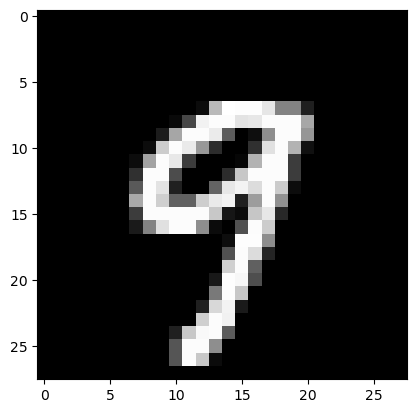

In [12]:
image = x_train[45]
plt.imshow(np.squeeze(image),cmap='gray')
plt.show

In [13]:
image= image.reshape(1,image.shape[0],image.shape[1],image.shape[2])
predict_model= model.predict([image])

1/1 [==============================] - 0s 77ms/step


In [14]:
print("%predicted class: {}".format(np.argmax(predict_model)))

%predicted class: 9
